In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
import json

# Load the JSON file
with open('finetuning.json', 'r') as f:
    data = json.load(f)  # Load the array from the JSON file

# Filter the array to keep only entries that contain the 'loss' attribute
training_data = [entry for entry in data if 'loss' in entry]
eval_data = [entry for entry in data if 'eval_loss' in entry]
print(len(training_data))
print(training_data[:2])
print(eval_data[:2])

484
[{'loss': 2.0891, 'grad_norm': 6.265888690948486, 'learning_rate': 1.9958679393413497e-05, 'epoch': 0.02}, {'loss': 0.3889, 'grad_norm': 2.2046730518341064, 'learning_rate': 1.9917358786826992e-05, 'epoch': 0.04}]
[{'eval_loss': 0.16209566593170166, 'eval_runtime': 416.1671, 'eval_samples_per_second': 51.691, 'eval_steps_per_second': 6.461, 'epoch': 1.0}, {'step': 24201, 'epoch': 1.0, 'elapsed_time': 11067.92029953003, 'memory_usage_mb': 6938.07421875, 'cpu_usage_percent': 166.0, 'eval_loss': 0.16209566593170166, 'eval_runtime': 416.1671, 'eval_samples_per_second': 51.691, 'eval_steps_per_second': 6.461}]


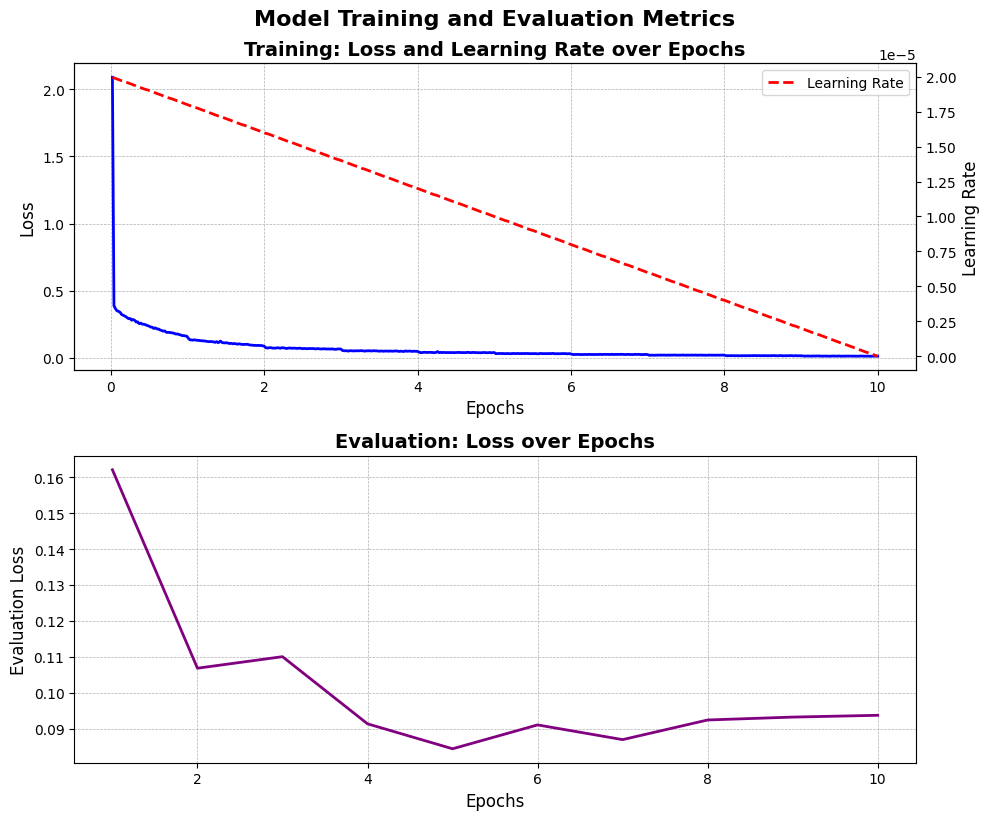

In [39]:
# Organizing the training data
train_epochs = [item['epoch'] for item in training_data]
train_loss = [item['loss'] for item in training_data]
train_grad_norm = [item['grad_norm'] for item in training_data]
train_learning_rate = [item['learning_rate'] for item in training_data]

# Organizing the evaluation data
eval_epochs = [item['epoch'] for item in eval_data if 'eval_loss' in item]
eval_loss = [item['eval_loss'] for item in eval_data if 'eval_loss' in item]
eval_runtime = [item['eval_runtime'] for item in eval_data if 'eval_runtime' in item]
eval_samples_per_second = [item['eval_samples_per_second'] for item in eval_data if 'eval_samples_per_second' in item]
eval_steps_per_second = [item['eval_steps_per_second'] for item in eval_data if 'eval_steps_per_second' in item]

# Create a figure with 2 subplots for training and evaluation
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plotting Training Loss and Learning Rate
axs[0].plot(train_epochs, train_loss, color='blue', label='Loss', linewidth=2)
axs[0].set_xlabel('Epochs', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plotting learning rate on the right axis
ax0_twin = axs[0].twinx()
ax0_twin.plot(train_epochs, train_learning_rate, color='red', label='Learning Rate', linestyle='--', linewidth=2)
ax0_twin.set_ylabel('Learning Rate', fontsize=12)
ax0_twin.grid(False)

# Adding title and legend to the training plot
axs[0].set_title('Training: Loss and Learning Rate over Epochs', fontsize=14, weight='bold')
ax0_twin.legend(loc='upper right', fontsize=10)
#ax0_twin.legend(loc='upper right', fontsize=10)

# Plotting Evaluation Loss
axs[1].plot(eval_epochs, eval_loss, color='purple', label='Evaluation Loss', linewidth=2)
axs[1].set_xlabel('Epochs', fontsize=12)
axs[1].set_ylabel('Evaluation Loss', fontsize=12)
axs[1].set_title('Evaluation: Loss over Epochs', fontsize=14, weight='bold')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjusting layout and showing the plot
plt.tight_layout()

# Adding a main title to the entire figure
plt.suptitle('Model Training and Evaluation Metrics', fontsize=16, weight='bold', y=1.02)
plt.savefig('model_training_evaluation_metrics.png', bbox_inches='tight')
plt.show()